In [2]:
import pandas as pd


In [60]:
df = pd.read_csv('adult_income.csv')
df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

PreProcessing

In [61]:
df.fnlwgt.value_counts() 
# this column is not needed because its  Final weight of the record. Basically interpret as the number of people represented by this row hence we can drop this column
df.drop('fnlwgt', axis=1, inplace=True)

In [62]:
df.education.value_counts()
# this value is already in order under educational_num column hence we need to drop this column
df.drop('education', axis=1, inplace=True)

In [63]:
df.workclass.value_counts()
# in this column we have ? as a value which we need to update with prefix workclass_
# candidate for one hot encoding

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [64]:
df['marital-status'].value_counts()
# candidate for one hot encoding

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [65]:
df.occupation.value_counts()
# in this column we have ? as a value which we need to update with prefix occupation_
# candidate for one hot encoding

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [66]:
df.relationship.value_counts()
# candidate for one hot encoding

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [67]:
df.race.value_counts()
# candidate for one hot encoding

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [68]:
df.gender.value_counts()
# we got more male examples then female examples hence we need to balance the data
# candidate for binary encoding

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [69]:
df['native-country'].value_counts()   

#list(df['native-country'].explode().unique()) #to see all unique values
# we have ? as a value which we need to update with prefix native-country_
# candidate for one hot encoding

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [70]:
df = df.join(pd.get_dummies(df['workclass'], prefix='workclass_', dtype=int)).drop('workclass', axis=1)
df = df.join(pd.get_dummies(df['marital-status'], prefix='marital-status_', dtype=int)).drop('marital-status', axis=1)
df = df.join(pd.get_dummies(df['occupation'], prefix='occupation_', dtype=int)).drop('occupation', axis=1)
df = df.join(pd.get_dummies(df['relationship'], prefix='relationship_', dtype=int)).drop('relationship', axis=1)
df = df.join(pd.get_dummies(df['race'], prefix='race_', dtype=int)).drop('race', axis=1)
df = df.join(pd.get_dummies(df['native-country'], prefix='native_', dtype=int)).drop('native-country', axis=1)


In [71]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [72]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df

age  educational-num  gender  capital-gain  capital-loss  \
0       25                7       1             0             0   
1       38                9       1             0             0   
2       28               12       1             0             0   
3       44               10       1          7688             0   
4       18               10       0             0             0   
...    ...              ...     ...           ...           ...   
48837   27               12       0             0             0   
48838   40                9       1             0             0   
48839   58                9       0             0             0   
48840   22                9       1             0             0   
48841   52                9       0         15024             0   

       hours-per-week  income  workclass__?  workclass__Federal-gov  \
0                  40       0             0                       0   
1                  50       0             0                       0   
2                  40       1             0                       0   
3                  40       1             0                       0   
4                  30       0             1                       0   
...               ...     ...           ...                     ...   
48837              38       0             0                       0   
48838              40       1             0                       0   
48839              40       0             0                       0   
48840              20       0             0                       0   
48841              40       1             0                       0   

       workclass__Local-gov  ...  native__Portugal  native__Puerto-Rico  \
0                         0  ...                 0                    0   
1                         0  ...                 0                    0   
2                         1  ...                 0                    0   
3                         0  ...                 0                    0   
4                         0  ...                 0                    0   
...                     ...  ...               ...                  ...   
48837                     0  ...                 0                    0   
48838                     0  ...                 0                    0   
48839                     0  ...                 0                    0   
48840                     0  ...                 0                    0   
48841                     0  ...                 0                    0   

       native__Scotland  native__South  native__Taiwan  native__Thailand  \
0                     0              0               0                 0   
1                     0              0               0                 0   
2                     0              0               0                 0   
3                     0              0               0                 0   
4                     0              0               0                 0   
...                 ...            ...             ...               ...   
48837                 0              0               0                 0   
48838                 0              0               0                 0   
48839                 0              0               0                 0   
48840                 0              0               0                 0   
48841                 0              0               0                 0   

       native__Trinadad&Tobago  native__United-States  native__Vietnam  \
0                            0                      1                0   
1                            0                      1                0   
2                            0                      1                0   
3                            0                      1                0   
4                            0                      1                0   
...                        ...                    ...              ...   
48837            

In [73]:
df.columns.values

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass__?',
       'workclass__Federal-gov', 'workclass__Local-gov',
       'workclass__Never-worked', 'workclass__Private',
       'workclass__Self-emp-inc', 'workclass__Self-emp-not-inc',
       'workclass__State-gov', 'workclass__Without-pay',
       'marital-status__Divorced', 'marital-status__Married-AF-spouse',
       'marital-status__Married-civ-spouse',
       'marital-status__Married-spouse-absent',
       'marital-status__Never-married', 'marital-status__Separated',
       'marital-status__Widowed', 'occupation__?',
       'occupation__Adm-clerical', 'occupation__Armed-Forces',
       'occupation__Craft-repair', 'occupation__Exec-managerial',
       'occupation__Farming-fishing', 'occupation__Handlers-cleaners',
       'occupation__Machine-op-inspct', 'occupation__Other-service',
       'occupation__Priv-house-serv', 'occupation__Prof-specialty',
       'occupatio

In [74]:
# we understand that we have some columns that are highly correlated with label income

correlation = df.corr()['income'].abs()
sorted_correlation = correlation.sort_values(ascending=False)

# will drop the columns that are less correlated with the label income

percentage_of_columns_to_drop = int(0.8 * len(df.columns))
columns_to_drop = sorted_correlation[percentage_of_columns_to_drop:].index
df_dropped = df.drop(columns_to_drop, axis=1)


In [76]:
df_dropped

age  educational-num  gender  capital-gain  capital-loss  \
0       25                7       1             0             0   
1       38                9       1             0             0   
2       28               12       1             0             0   
3       44               10       1          7688             0   
4       18               10       0             0             0   
...    ...              ...     ...           ...           ...   
48837   27               12       0             0             0   
48838   40                9       1             0             0   
48839   58                9       0             0             0   
48840   22                9       1             0             0   
48841   52                9       0         15024             0   

       hours-per-week  income  workclass__?  workclass__Federal-gov  \
0                  40       0             0                       0   
1                  50       0             0                       0   
2                  40       1             0                       0   
3                  40       1             0                       0   
4                  30       0             1                       0   
...               ...     ...           ...                     ...   
48837              38       0             0                       0   
48838              40       1             0                       0   
48839              40       0             0                       0   
48840              20       0             0                       0   
48841              40       1             0                       0   

       workclass__Local-gov  ...  native__Mexico  native__Nicaragua  \
0                         0  ...               0                  0   
1                         0  ...               0                  0   
2                         1  ...               0                  0   
3                         0  ...               0                  0   
4                         0  ...               0                  0   
...                     ...  ...             ...                ...   
48837                     0  ...               0                  0   
48838                     0  ...               0                  0   
48839                     0  ...               0                  0   
48840                     0  ...               0                  0   
48841                     0  ...               0                  0   

       native__Outlying-US(Guam-USVI-etc)  native__Peru  native__Philippines  \
0                                       0             0                    0   
1                                       0             0                    0   
2                                       0             0                    0   
3                                       0             0                    0   
4                                       0             0                    0   
...                                   ...           ...                  ...   
48837                                   0             0                    0   
48838                                   0             0                    0   
48839                                   0             0                    0   
48840                                   0             0                    0   
48841                                   0             0                    0   

       native__Puerto-Rico  native__Taiwan  native__Trinadad&Tobago  \
0                        0               0                        0   
1                        0               0                        0   
2                        0               0                        0   
3                        0               0                        0   
4                        0               0                        0   
...                    ...             ...                      ...   
48837                    0            

<Axes: >

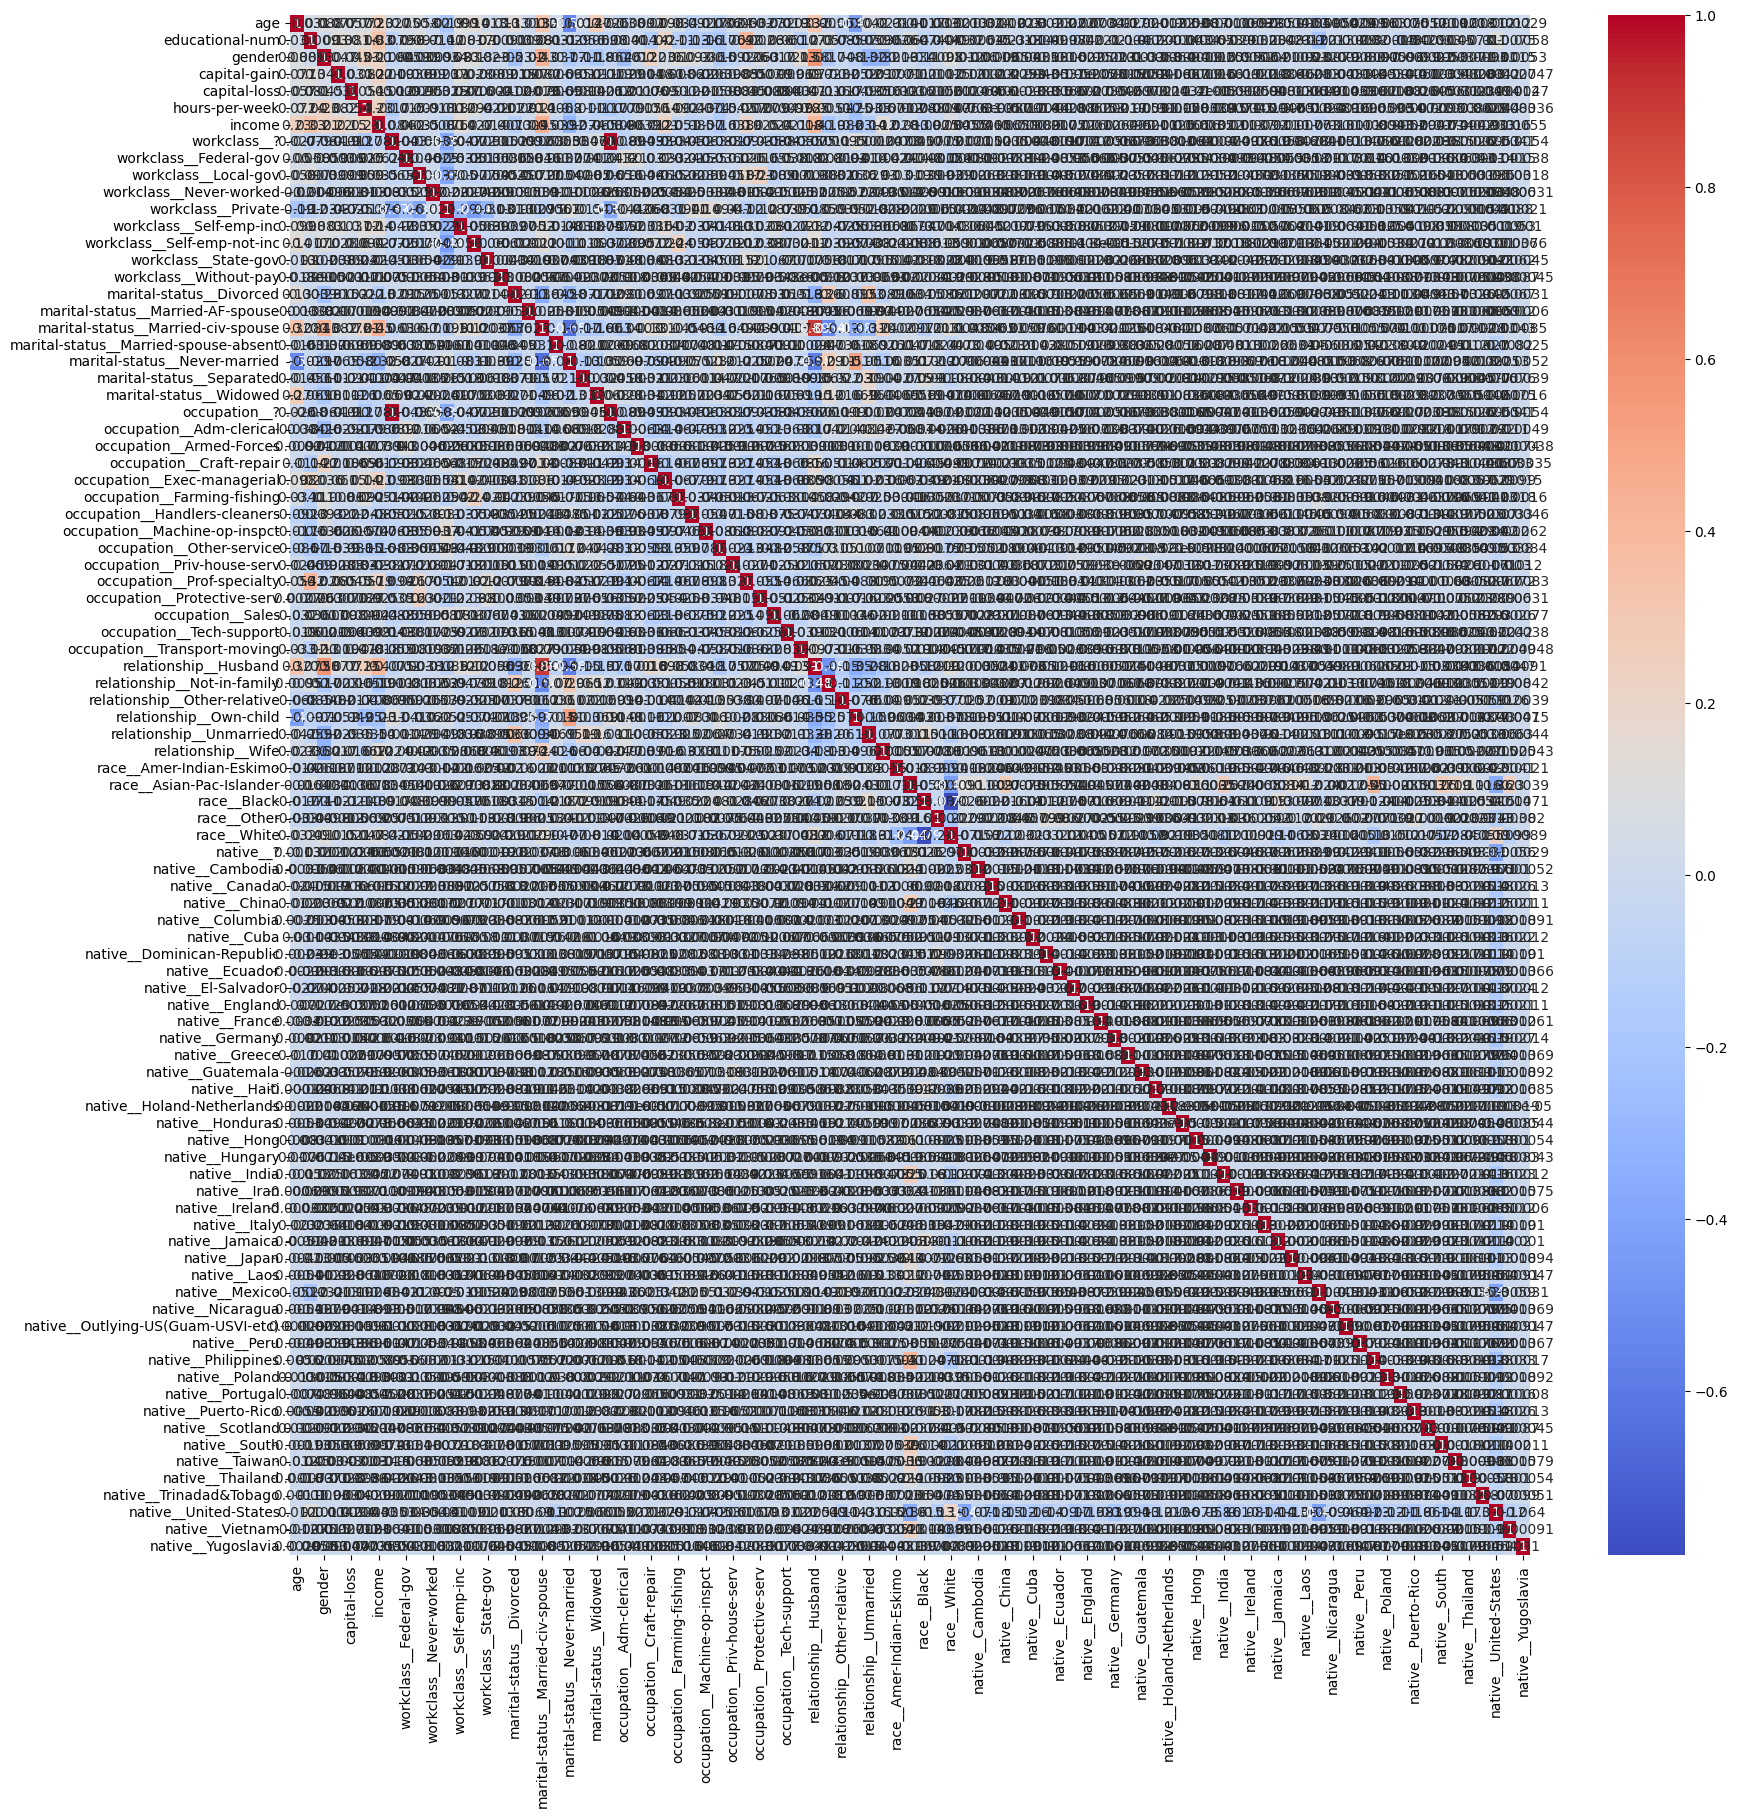

In [75]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Model training

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df_dropped.drop('income', axis=1)
y = df_dropped['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)  


0.8569966219674481

Hyperparameter tuning

In [79]:
# understanding the feature importance
importances = dict(zip(model.feature_names_in_, model.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}

importances

{'age': 0.23102215273585924,
 'educational-num': 0.1326377752075906,
 'hours-per-week': 0.11571733945910614,
 'capital-gain': 0.11098559483549385,
 'marital-status__Married-civ-spouse': 0.07042314617237436,
 'relationship__Husband': 0.054968585285876066,
 'capital-loss': 0.03763711899763887,
 'occupation__Exec-managerial': 0.020562344226764454,
 'marital-status__Never-married': 0.018278739318137626,
 'occupation__Prof-specialty': 0.018089744837414365,
 'gender': 0.012129550863433763,
 'relationship__Not-in-family': 0.011728692957425558,
 'relationship__Wife': 0.00953147424326946,
 'workclass__Private': 0.009425520225820954,
 'native__United-States': 0.00884844355120979,
 'occupation__Other-service': 0.008258773390511228,
 'workclass__Self-emp-not-inc': 0.00793186959829266,
 'relationship__Own-child': 0.007769335714535837,
 'race__White': 0.0064855668334043055,
 'occupation__Sales': 0.006370267751875111,
 'occupation__Craft-repair': 0.006088527530508638,
 'workclass__Self-emp-inc': 0.00

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=10)

In [85]:
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 2 folds for each of 120 candidates, totalling 240 fits


RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

In [86]:
forest = grid_search.best_estimator_ 
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

accuracy_score(y_test, y_pred)

0.8715323984031119